# Summary
## Code Steps
1. Imported the data set
2. Data analysis was covered in previous assignment so not included here
3. Split the data set into training and testing
4. Created and fit the LinearSVC and SVC models
5. Demonstrated performance with mean squared eror
6. Plotted the learning curves of the two models

## References
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron
https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
* Dr. Yoshigoe assignment 3

Import data and libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
from sklearn.datasets import load_diabetes
df = load_diabetes(as_frame = True)
X = df.data
y = df.target

Split the data into a training set and a testing set

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3)


Create the models and fit them

In [149]:
from sklearn.svm import LinearSVR, SVR

lin_SVR_model = LinearSVR(random_state=42, C=1, max_iter=5000)
lin_SVR_model.fit(X_train, y_train)

SVR_model = SVR(kernel='poly', C=1, epsilon=0.3, degree=3)
SVR_model.fit(X_train, y_train)

SVR(C=1, epsilon=0.3, kernel='poly')

Get predictions from the models

In [150]:
lin_pred = lin_SVR_model.predict(X_test)
SVR_pred = SVR_model.predict(X_test)

Test the model's performance with mean square error

In [151]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, lin_pred)
SVR_mse = mean_squared_error(y_test, SVR_pred)
print(lin_mse)
print(SVR_mse)

7723.167012844086
4580.847040553208


funciton for plotting the learning curves of the data

In [152]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

Plot the learning curves

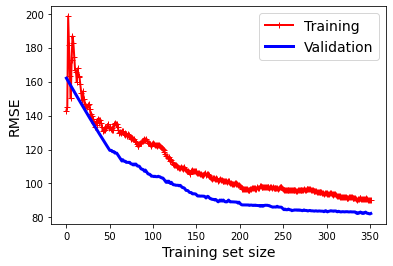

In [153]:
plot_learning_curve(lin_SVR_model, X, y)

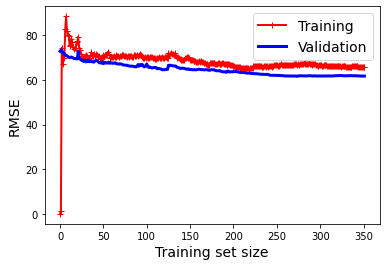

In [154]:
plot_learning_curve(SVR_model, X, y)
